In [15]:
p = 2_549_536_629_329
bits_48 = 2 ** 48 - 1
scale = 0x07ffffffff
from hashlib import sha256
import numpy as np
import random
from matplotlib import pyplot as plt
def get_ath_hash(a):
    def my_hash(subseq):
        return (((int(sha256(subseq).hexdigest(), 16) % bits_48) * a) % p) & scale
    return my_hash 

random.seed(1) # reproducible randomness

# Randomly generate different nucleic acids to compose a fake chromosome sequence 
def random_test(n):
    nucleic_acid_choices = ['a','c','t','g','n']
    fake_seq_list= []
    for i in range(n):
        fake_seq_list.append(random.choice(nucleic_acid_choices))
        # Joining each individual numbers into the entire sequence 
        fake_seq = "".join(fake_seq_list)
        # Encode the fake sequence
        fake_seq = fake_seq.encode('utf8')
    return fake_seq

In [16]:
# Generate a fake sequence that consists of 100000 bases
fake_seq1 = random_test(100000)

fake_subseq1=[fake_seq1[i:i+15] for i in range(len(fake_seq1)-14)]
print(f"There are {len(set(fake_subseq1))} true distinct subsequences in fake_seq1") 

There are 99986 true distinct subsequences in fake_seq1


There are 99986 true distinct subsequences in fake_seq1

In [17]:
def estimate_distinct_values(a,seq):
    min_list = []
    for i in range(1,a+1):
        my_hash = get_ath_hash(i)   
        min_h = my_hash(seq[0:15])
        for j in range(1, len(seq)-14):
            new_h = my_hash(seq[j:j+15])
            if new_h < min_h:
                min_h = new_h
        min_h = min_h/scale
        min_list.append(min_h)
        min_arr = np.array(min_list)
     
    mean_hash_list = []
    median_hash_list = []  
    for i in range(len(min_arr)):
        distinct_values = (1/min_arr[0:i+1])-1
        mean_hash = np.mean(min_arr[0:i+1])
        mean_hash_list.append(mean_hash)       
        median_hash = np.median(min_arr[0:i+1])
        median_hash_list.append(median_hash)   
        
        mean_list = []
        median_list = [] 
        for j in range(len(distinct_values)): 
            mean_list.append(np.mean(distinct_values[0:j+1]))
            median_list.append(np.median(distinct_values[0:j+1]))   
        
    mean_distinct_values = np.array(mean_list)
    median_distinct_values = np.array(median_list)     
        
    mean_hash_arr = np.array(mean_hash_list)
    mean_hash_estimates = (1/mean_hash_arr)-1
    median_hash_arr = np.array(median_hash_list)
    median_hash_estimates = (1/median_hash_arr)-1

    return mean_hash_estimates, median_hash_estimates, mean_distinct_values, median_distinct_values

In [18]:
estimates_test1_results = estimate_distinct_values(100,fake_seq1)
estimates_test1_results

(array([110112.6023606 , 144437.44028417, 198288.89075698,  97153.37687052,
        100148.17083958,  83074.84040661,  92257.35165345,  94115.35035325,
         85821.20129434,  94031.42163791,  89577.47645679,  87327.88335092,
         90602.38663284,  97273.40657752,  90797.26011046,  96283.68753773,
         98754.12883879,  97939.04002733,  98963.82540619, 100828.49727485,
        100330.17294022, 103045.01554835, 101985.64108348, 101635.66056839,
        104539.08755573, 106558.03142165, 104387.73701055, 107886.70862426,
        111440.47188358, 101328.43809804, 104620.65211818, 107698.61613931,
        108621.71617209, 110189.40818866, 111726.75409199, 112919.02598561,
        110011.50336763, 111769.05452145, 108877.79486472, 108029.95150258,
        109275.58614781, 111578.1902989 , 113998.01652307, 109482.41776399,
        111515.38092438, 113027.57507952, 110118.18872426, 107131.97278764,
        106153.29488154, 106959.15967381, 107270.63019257, 108261.54030043,
        1089

(array([110112.6023606 , 144437.44028417, 198288.89075698,  97153.37687052,
        100148.17083958,  83074.84040661,  92257.35165345,  94115.35035325,
         85821.20129434,  94031.42163791,  89577.47645679,  87327.88335092,
         90602.38663284,  97273.40657752,  90797.26011046,  96283.68753773,
         98754.12883879,  97939.04002733,  98963.82540619, 100828.49727485,
        100330.17294022, 103045.01554835, 101985.64108348, 101635.66056839,
        104539.08755573, 106558.03142165, 104387.73701055, 107886.70862426,
        111440.47188358, 101328.43809804, 104620.65211818, 107698.61613931,
        108621.71617209, 110189.40818866, 111726.75409199, 112919.02598561,
        110011.50336763, 111769.05452145, 108877.79486472, 108029.95150258,
        109275.58614781, 111578.1902989 , 113998.01652307, 109482.41776399,
        111515.38092438, 113027.57507952, 110118.18872426, 107131.97278764,
        106153.29488154, 106959.15967381, 107270.63019257, 108261.54030043,
        108901.4575869 , 106106.26897389, 107120.32737276, 108695.17536724,
        109531.77065005, 111155.55984126, 113041.7872055 , 114639.21665809,
        116399.20750374, 107997.25335221, 109392.5957716 , 110432.5863748 ,
        110447.01435642, 109335.61940754, 107393.68957314, 107360.71935905,
        104361.43288831, 105522.59994976, 106916.22420413, 106640.13567364,
        106940.35830778, 106340.9558797 , 107200.54324494, 107439.09106129,
        107988.35356668, 106311.84710327, 106423.12397024, 106437.12972749,
        106499.77741028, 106434.61818874, 107101.25718562, 108051.56599199,
        108438.58134989, 108262.59219756, 109233.85533609, 109187.93270248,
        110342.08554469, 111129.74899655, 111098.24626986, 111381.2209196 ,
        112211.93932804, 113278.49361586, 114430.09534849, 114588.12315746,
        114206.8910313 , 114967.13178559, 115111.64445477, 115951.75883613]),
        show more (open the raw output data in a text editor) ...

        164718.85602244, 160973.09872836, 157227.34143428, 157140.02309879,
        157052.7047633 , 153363.1266092 , 157052.7047633 , 157140.02309879,
        157052.7047633 , 156078.58540727, 157052.7047633 , 156078.58540727,
        157052.7047633 , 157140.02309879, 157052.7047633 , 156078.58540727,
        157052.7047633 , 157140.02309879, 157227.34143428, 157140.02309879,
        157052.7047633 , 157140.02309879, 157052.7047633 , 157140.02309879]))

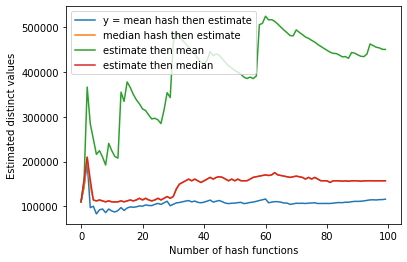

In [19]:
x = np.arange(100)
plt.plot(x, estimates_test1_results[0])
plt.plot(x, estimates_test1_results[1])
plt.plot(x, estimates_test1_results[2])
plt.plot(x, estimates_test1_results[3])
plt.ylabel('Estimated distinct values')
plt.xlabel('Number of hash functions')
plt.legend(['y = mean hash then estimate', 'median hash then estimate', 'estimate then mean', 'estimate then median'], loc='upper left')
plt.show()

In [22]:
random.seed(1)
# Generate a fake sequence that consists of 10000 bases
fake_seq2 = random_test(10000)

fake_subseq2=[fake_seq2[i:i+15] for i in range(len(fake_seq2)-14)]
print(f"There are {len(set(fake_subseq2))} true distinct subsequences in fake_seq2") 

There are 9986 true distinct subsequences in fake_seq2


There are 9986 true distinct subsequences in fake_seq2

In [23]:
estimates_test2_results = estimate_distinct_values(100,fake_seq2)
estimates_test2_results

(array([69149.70050233, 22368.50482484, 23066.36404149, 23156.66803136,
        23129.69654422, 25160.38881306, 23238.87376716, 20304.27785644,
        16494.3295044 , 17119.20612118, 16219.24206166, 15452.39236455,
        11062.79103263, 10764.12498011, 11347.38077928, 12007.08126852,
        12644.80641691, 11679.13777346, 11190.26719614, 11268.2271557 ,
        11621.25267773, 11772.874411  , 12102.24047849, 12558.30963491,
        12915.87340977, 13117.41805414, 13440.54599051, 12894.551195  ,
        11732.23343975, 11782.64997896, 11899.78964923, 11411.12040668,
        11736.08742716, 11073.83833179, 11226.57989311, 10548.71553958,
        10344.74763259, 10340.84685008,  9730.96835136,  9928.34272929,
         9633.39652272,  9865.5543114 ,  9919.7784728 , 10060.0587759 ,
         9887.94756842, 10047.86700528, 10205.23655812, 10374.55495415,
        10460.43101157, 10252.56598285, 10419.35400369, 10425.5788041 ,
        10478.60886301, 10192.24406005,  9853.74306917,  8897.58

(array([69149.70050233, 22368.50482484, 23066.36404149, 23156.66803136,
        23129.69654422, 25160.38881306, 23238.87376716, 20304.27785644,
        16494.3295044 , 17119.20612118, 16219.24206166, 15452.39236455,
        11062.79103263, 10764.12498011, 11347.38077928, 12007.08126852,
        12644.80641691, 11679.13777346, 11190.26719614, 11268.2271557 ,
        11621.25267773, 11772.874411  , 12102.24047849, 12558.30963491,
        12915.87340977, 13117.41805414, 13440.54599051, 12894.551195  ,
        11732.23343975, 11782.64997896, 11899.78964923, 11411.12040668,
        11736.08742716, 11073.83833179, 11226.57989311, 10548.71553958,
        10344.74763259, 10340.84685008,  9730.96835136,  9928.34272929,
         9633.39652272,  9865.5543114 ,  9919.7784728 , 10060.0587759 ,
         9887.94756842, 10047.86700528, 10205.23655812, 10374.55495415,
        10460.43101157, 10252.56598285, 10419.35400369, 10425.5788041 ,
        10478.60886301, 10192.24406005,  9853.74306917,  8897.58947733,
         8727.94363164,  8751.04440978,  8735.97156666,  8692.7760596 ,
         8530.22469634,  8280.35407496,  8411.88057907,  8515.44832156,
         8638.19621897,  8753.50421591,  8715.80604494,  8730.63800146,
         8643.82295314,  8547.52860277,  8625.64152859,  8713.42370487,
         8469.0916422 ,  8270.45627948,  8277.57668783,  8354.51821934,
         8407.3596683 ,  8494.83992419,  8577.24486003,  8655.36229873,
         8755.08955255,  8851.05839854,  8841.67540756,  8945.88877289,
         8787.80490321,  8813.64069214,  8887.95235902,  8919.10934762,
          8921.42060033,  8824.48731395,  8914.47833557,  8970.34516358,
         9052.26925492,  9115.05654568,  9211.68925681,  9270.48685388,
         9203.45432789,  9260.29159692,  9334.77406075,  9138.01791483]),
show more (open the raw output data in a text editor) ...

        13341.89336671, 13400.9620001 , 13460.03063348, 13853.40652667,
        14246.78241986, 15091.5456722 , 14246.78241986, 15091.5456722 ,
        14246.78241986, 13853.40652667, 14246.78241986, 13853.40652667,
        13460.03063348, 13400.9620001 , 13460.03063348, 13853.40652667,
        14246.78241986, 15091.5456722 , 15936.30892454, 16062.49256593,
        15936.30892454, 16062.49256593, 16188.67620731, 16062.49256593]))

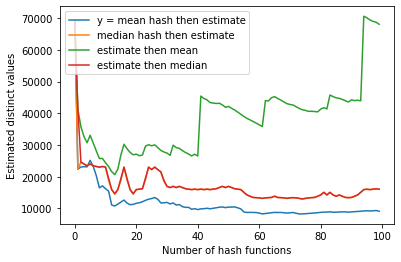

In [24]:
x = np.arange(100)
plt.plot(x, estimates_test2_results[0])
plt.plot(x, estimates_test2_results[1])
plt.plot(x, estimates_test2_results[2])
plt.plot(x, estimates_test2_results[3])
plt.ylabel('Estimated distinct values')
plt.xlabel('Number of hash functions')
plt.legend(['y = mean hash then estimate', 'median hash then estimate', 'estimate then mean', 'estimate then median'], loc='upper left')
plt.show()

In [26]:
from Bio import SeqIO

human_genome = SeqIO.parse("GCA_000001405.28_GRCh38.p13_genomic.fna", "fasta")
for chromosome in human_genome:
    if chromosome.name == "CM000664.2":
        sequence = str(chromosome.seq).lower().encode('utf8')
        
        def estimate_value(a,seq):
            min_list= []
            for i in range(1,a+1):
                my_hash = get_ath_hash(i)   
                min_h = my_hash(seq[0:15])
                for j in range(1, len(seq)-14):
                    new_h = my_hash(seq[j:j+15])
                    if new_h < min_h:
                        min_h = new_h
                min_h = min_h/scale
                min_list.append(min_h)
                min_arr = np.array(min_list)
        
            mean_hash_list=[]
            mean_hash=0
            total=0
            for count,hash in enumerate(min_arr,start=1):
                total+=hash
                mean_hash_list.append(total/count)
            mean_hash_list=np.array(mean_hash_list)
            mean_hash_estimates=(1/mean_hash_list)-1
            
            return mean_hash_estimates
        
        estimate_results = estimate_value(100,sequence)

KeyboardInterrupt: 

In [ ]:
estimate_results

array([6.60764189e+07, 9.85932224e+07, 1.42178227e+08, 1.27376230e+08,
       1.50305066e+08, 1.41107754e+08, 1.16304723e+08, 1.28990101e+08,
       1.43431189e+08, 1.33539596e+08, 1.08421434e+08, 1.04915231e+08,
       1.05597304e+08, 1.12496804e+08, 1.18373007e+08, 1.22713350e+08,
       1.08370231e+08, 1.12164542e+08, 1.16640169e+08, 1.22146243e+08,
       1.26145892e+08, 1.17761994e+08, 1.18909716e+08, 1.21681233e+08,
       1.23649554e+08, 1.27095346e+08, 1.30351683e+08, 1.32882965e+08,
       1.33391219e+08, 1.36204036e+08, 1.25889597e+08, 1.26192083e+08,
       1.21373513e+08, 1.22033960e+08, 1.22214516e+08, 1.22749883e+08,
       1.25810026e+08, 1.22139387e+08, 1.24364713e+08, 1.26870629e+08,
       1.29266770e+08, 1.30929868e+08, 1.32070147e+08, 1.33991711e+08,
       1.31814852e+08, 1.31416642e+08, 1.32033987e+08, 1.34425579e+08,
       1.35885970e+08, 1.34955766e+08, 1.36475595e+08, 1.35943573e+08,
       1.38126981e+08, 1.40371150e+08, 1.42938174e+08, 1.42889153e+08,
       1.45095946e+08, 1.40858412e+08, 1.43145357e+08, 1.44682735e+08,
       1.43912663e+08, 1.43088646e+08, 1.44426441e+08, 1.38547331e+08,
       1.34735942e+08, 1.32083564e+08, 1.33975584e+08, 1.35290225e+08,
       1.36875581e+08, 1.36595960e+08, 1.34669688e+08, 1.33666584e+08,
       1.29666092e+08, 1.31062919e+08, 1.29763853e+08, 1.28561446e+08,
       1.28519374e+08, 1.29122161e+08, 1.29264218e+08, 1.30181343e+08,
       1.30321164e+08, 1.27292786e+08, 1.26895891e+08, 1.27454979e+08,
       1.28642811e+08, 1.29200187e+08, 1.30105206e+08, 1.29166430e+08,
       1.30411390e+08, 1.31657716e+08, 1.33097913e+08, 1.33797338e+08,
       1.34229003e+08, 1.33386280e+08, 1.32110050e+08, 1.33091303e+08,
       1.32510122e+08, 1.33193083e+08, 1.32875550e+08, 1.33799603e+08])

In [ ]:
print(f"There are total of {len(subseq)} (potentially duplicated) subsequences.")
        # There are total of 242193515 (potentially duplicated) subsequences.

        subseq_noN=[i for i in range(len(subseq)) if sequence[i:i+15].count(b'n')<=2] 
        print(f"There are total of {len(subseq_noN)} subsequences that do not contain more than 2 Ns")
        # There are total of 240548031 subsequences that do not contain more than 2 Ns

        # First find out the true distinct subsequences
        print(f"There are {len(set(subseq))} true distinct subsequences") 
        # There are 145003145 true distinct subsequences

In [ ]:
x = np.arange(100)
plt.plot(x, estimate_results)
plt.ylabel('Estimated distinct values')
plt.xlabel('Number of hash functions')
plt.legend(['y = mean hash then estimate'], loc='upper left')
plt.show()

estimate_results_100 = estimate_results[-1]
estimate_results_100

133799603.23286605

In [ ]:
estimate_results_1 = estimate_results[0]
estimate_results_1

66076418.93653846

In [ ]:
estimate_results_10 = estimate_results[9]
estimate_results_10

133539596.22891568